# CS5228 Assignment 1b - Clustering &  Association Rule Mining

Hello everyone, this assignment notebook covers Clustering (again) and Association Rule Mining (ARM). There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Remember to rename and save this Jupyter notebook as **A1b_YourName_YourNUSNETID.ipynb** (e.g., **A1b_BobSmith_e12345678.ipynb**) before submission! Failure to do so will yield a penalty of 1 Point.
* Remember to rename and save the script file **A1b_script.py** as **A1b_YourName_YourNUSNETID.py** (e.g., **A1b_BobSmith_e12345678.py**) before submission! Failure to do so will yield a penalty of 1 Point.
* Submission deadline is Sep 11, 11.59 pm (together with A1a). Late submissions will be penalized by 10% for each additional day.

Please also add your nusnet and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [47]:
student_id = 'A0248326B'
nusnet_id = 'E0925478'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1 Clustering Algorithms (30 Points)**
    * 1.1 Implementing K-Means++ (12 Points)
        * 1.1 a) Initializing Centroids Based on K-Means++ (5 Points)
        * 1.1 b) Assigning Data Points to Clusters (4 Points)
        * 1.1 c) Updating the Centroids (3 Points)
    * 1.2 Questions about Clustering Algorithms (18 Points)
        * 1.2 a) Questions about K-Means (6 Points)
        * 1.2 b) Interpreting Dendrograms (6 Points)
        * 1.2 c) Comparing the Results of Different Clustering Algorithms (6 Points)
* **2 Association Rule Mining (20 Points)**
    * 2.1 Implementing Apriori Algorithm (10 Points)
        * 2.1 a) Create Candidate Itemsets $L_k$ (6 Points)
        * 2.1 b) Generate Frequent Itemsets with Apriori Algorithm (4 Points)
    * 2.2 Recommending Movies using ARM (10 Points)
        * 2.2 a) Compare the Runs A-D and Discuss your Observations! (3 Points) 
        * 2.2 b) Compare the Runs A-D and Discuss the Results for Building a Recommendation Engine! (3 Points)
        * 2.2 c) Sketch a Movie Recommendation Algorithm Based on ARM (4 Points)

## Setting up the Notebook

In [48]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# This will automatically reload a .py file every time you make changes and save the file
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from sklearn.cluster import KMeans

from efficient_apriori import apriori

from src.utils import *

np.set_printoptions(precision=2)

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `A1b_script.py`, you also need to edit the import statement below accordingly.

In [6]:
from A1b_GanKaiyuan_E0925478 import MyKMeans
#from A1b_BobSmith_e12345678 import MyKMeans # <-- you well need to rename this accordingly

-------------------

# 1 Clustering

In A1a, we also covered the clustering DBSCAN in the context of noise / outlier detection. In this notebook, we focus on K-Means as well as cover questions about clustering in general.

## 1.1 Implementing K-Means++

**Important:** The script file `A1b_script.py` contains the skeleton code for your implementation of K-Means++. All the methods you need to complete are in this file.

**Loading a Toy Dataset.** For easy testing and debugging your implementation of K-Means++, we provide you with a simple 2-dimensional dataset containing 100 data points. Just by looking at the plot, one can argue that there are six clusters; although that is not important for the testing and debugging. Later, you can try different values for $k$ and visualize the result using a method we provide as well.

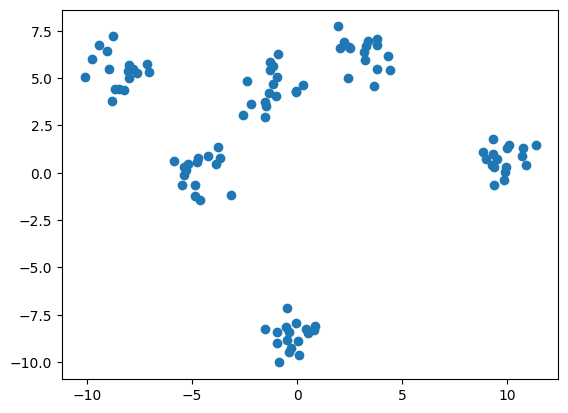

In [7]:
X_kmeans = pd.read_csv('data/a1-kmeans-toy-data.csv', header=None).to_numpy()

plt.figure()
plt.scatter(X_kmeans[:,0], X_kmeans[:,1])
plt.show()

#### 1.1 a) Initializing Centroids Based on K-Means++ (5 Points)

As we learned in the lecture, K-Means is rather sensitive to the initialization of the clusters. The most common initialization method is **K-Means++** (see lecture slides). Note that K-Means++ is non-deterministic as it picks the next centroids based on probabilities depending on the distances between the data points and the existing centroids. You will implement the K-Means++ initialization in this task.

**Implement method `initialize_centroids()` to calculate the initial centroids based on K-Means++!**

**Important:** Avoid using loops in the parts of the code you have to complete. If you use loops but the results are correct, there will be some minor deduction of points. Note that we already imported the method `euclidean_distances()` for you, and you can use anything provided by `numpy` (Hint: Check out the method [`np.random.choice()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) as it might  come in very handy).

With the code cell below, you can check your implementation.

In [8]:
# Make the randomness "predictable" so the result is always the same
# (if you remove this line, the output will change for each run)
np.random.seed(0) 

my_kmeans = MyKMeans(n_clusters=3)
my_kmeans.initialize_centroids(X_kmeans)

print(my_kmeans.cluster_centers_)

[[-0.55 -8.16]
 [-7.8   5.45]
 [-4.86 -1.23]]


The output of the code cell above should be:
    
```
[[-0.55 -8.16]
 [-7.8   5.45]
 [-4.86 -1.23]]

```

an array with $k=3$ rows -- one for each centroid (i.e., cluster center) -- and each row is an array with 2 coordinates since our dataset is just 2-dimensional. If you change the value for $k$, the shape of the array will change accordingly.

#### 1.1 b) Assigning Data Points to Clusters (4 Points)

In this step, each data point is assigned to its nearest centroid. Calculating distances and finding the smallest values is very easy with `sklearn` or `numpy`. (Hint: You may want to check [`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html))

**Implement method `assign_clusters()` to assign each data point to its nearest centroid!** Calculating distances and finding the smallest values is very easy with `sklearn` or `numpy`. (Hint: You may want to check [`np.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html))

The method `assign_clusters()` needs update `self.labels_` which is a 1-dimensional array of length $N$ (number of data points). Each element in `self.labels_` is a value ranging from $0$ to $(k-1)$ indicating to which cluster id a data point belongs to. For example, if `self.labels_ = [1, 0, 2, 2, 1]`, the first and the last data point belong the same cluster. The second data point forms its own cluster; the third and forth data points form the third cluster (here $k=3$)

With the code cell below, you can check your implementation.

In [9]:
my_kmeans.assign_clusters(X_kmeans)

print(my_kmeans.labels_)

[1 0 1 2 0 1 2 0 2 1 1 1 2 1 2 0 0 0 0 0 1 1 2 2 2 1 2 0 2 2 2 1 2 1 1 2 1
 0 0 0 2 2 0 1 0 1 0 0 1 1 2 2 0 0 0 0 1 2 0 1 2 2 2 1 2 2 0 1 2 0 1 2 0 0
 1 0 1 1 0 2 2 0 1 0 2 0 1 1 1 2 2 0 1 0 2 1 0 1 0 1]


The output of the code cell above should be:

```
[1 0 1 2 0 1 2 0 2 1 1 1 2 1 2 0 0 0 0 0 1 1 2 2 2 1 2 0 2 2 2 1 2 1 1 2 1
 0 0 0 2 2 0 1 0 1 0 0 1 1 2 2 0 0 0 0 1 2 0 1 2 2 2 1 2 2 0 1 2 0 1 2 0 0
 1 0 1 1 0 2 2 0 1 0 2 0 1 1 1 2 2 0 1 0 2 1 0 1 0 1]
```

Recall that we have 100 data points and set $k=3$. Hence, the length of the array is 100 and each element is either 0, 1, or 2, representing the cluster id/label. Note that the cluster id has no intrinsic meaning, it's only important that points in the same cluster have the same id/label. For example, the result `[1, 1, 0, 2, 1, 2]` would represent the same clustering as `[0, 0, 2, 1, 0, 1]`

#### 1.1 c) Updating the Centroids (4 Points)

After the assignment of the data points to clusters, all centroids need to be moved to the average of their respective clusters. Note that the centroids might not change because the assignment made no changes to the clusters and K-Means is done. We already handle this part in the given skeleton of the implementation.

**Implement `update_centroids()` to update the centroids (i.e., cluster center) with respect to the new cluster assignments!** As usual, we recommend making good use of `numpy`, or maybe `sklearn`.

With the code cell below, you can check your implementation.

In [10]:
my_kmeans.update_centroids(X_kmeans)

print(my_kmeans.cluster_centers_)

[[ 4.81 -3.95]
 [-3.66  5.82]
 [-2.02  2.25]]


The output of the code cell above should be:

```
[[ 4.81 -3.95]
 [-3.66  5.82]
 [-2.02  2.25]]
```

Again, the output reflects our setting of $k=3$ and our 2-dimensional dataset.

**Putting it all together (nothing for you to do here!)** With the initialization of the centroids, the assignment to cluster, and the update of the centroids in place, we have everything in place to perform K-Means++ over a dataset X given a choice for k. The method `fit()` below performs K-Means++ using your implementations of the methods `initialize_centroids()`, `assign_clusters()`, and `update_centroids()`. Note that we can exit the main loop once there is no more change in the cluster assignments; if all fails, the algorithm stops after `max_iter` iterations.

In [11]:
np.random.seed(5) 

my_kmeans = MyKMeans(n_clusters=3).fit(X_kmeans)

print('Number of iterations: {}\n'.format(my_kmeans.n_iter_))
print('Final cluster centers:\n{}\n'.format(my_kmeans.cluster_centers_))
print('Final cluster labels:\n{}\n'.format(my_kmeans.labels_))

Number of iterations: 5

Final cluster centers:
[[-4.8   3.38]
 [ 6.62  3.43]
 [-0.25 -8.62]]

Final cluster labels:
[0 2 0 0 1 1 1 2 0 0 0 0 0 0 0 1 2 2 2 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 1 2 0 2 0 1 1 0 1 0 0 1 2 2 2 0 0 2 0 0 0 0 1 0 0 1 0 0 2 0 0 2 1
 0 2 0 0 2 0 0 2 1 1 0 1 0 0 1 0 1 2 1 1 0 0 1 1 1 0]



For a final test, you can also compare your implementation with scitkit-learn's implementation [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Since we adopted the variable and method names from `KMeans` for `MyKMeans`, the code in the cell below is almost identical to the one above.

In [12]:
np.random.seed(5) 

sk_kmeans = KMeans(n_clusters=3).fit(X_kmeans)

print('Number of iterations: {}\n'.format(sk_kmeans.n_iter_))
print('Final cluster centers:\n{}\n'.format(sk_kmeans.cluster_centers_))
print('Final cluster labels:\n{}\n'.format(sk_kmeans.labels_))

Number of iterations: 3

Final cluster centers:
[[-4.8   3.38]
 [ 6.62  3.43]
 [-0.25 -8.62]]

Final cluster labels:
[0 2 0 0 1 1 1 2 0 0 0 0 0 0 0 1 2 2 2 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 1 2 0 2 0 1 1 0 1 0 0 1 2 2 2 0 0 2 0 0 0 0 1 0 0 1 0 0 2 0 0 2 1
 0 2 0 0 2 0 0 2 1 1 0 1 0 0 1 0 1 2 1 1 0 0 1 1 1 0]



**Important:** As the initialization of the centroids has a random component, the result of `KMeans` and `MyKMeans` might generally not be the same. Even if the final centroids are the same, the order might differ. And again, recall from above that, e.g., the labels `[1, 1, 0, 2, 1, 2]` would represent the same clustering as `[0, 0, 2, 1, 0, 1]`. Only with the chosen values for `np.random.seed()` we see the same results. Still, note that the number of iterations differ.

**Visualization (nothing for you to do here!)** We provide you with auxiliary method `plot_kmeans_clustering()`; you can checkout `src.utils` to have a look at the code of the method. Feel free to go back and run `MyKMeans` or `KMeans` with different values for $k$ (visually we could already tell that $k=5$ is probably the best choice) and/or different random seeds (or not setting any seed at all). Just note that the given expected outcomes will no longer match for other values for $k$ and other seeds. But you can always visualize the result to assess whether the results look meaningful.

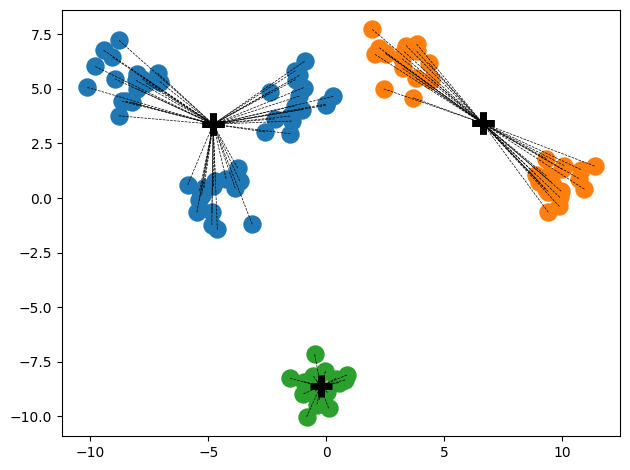

In [13]:
#plot_kmeans_clustering(X_kmeans, my_kmeans.labels_, my_kmeans.cluster_centers_) # For your implementation
plot_kmeans_clustering(X_kmeans, my_kmeans.labels_, sk_kmeans.cluster_centers_) # For sklearn's implementation

You have now completed the implementation of K-Means (more specifically, K-Means++). Well done! We will check how your implementation will perform on a larger dataset and see how it compares to the solutions of your peers :).

### 1.2 Questions about Clustering Algorithms

#### 1.2 a) Questions about K-Means (6 Points)

In the table below are 6 statements that are either True or False. Complete the table to specify whether a statement is True or False, and provide a brief explanation for your answer (Your explanation is more important than a simple True/False answer).

This is a markdown cell. Please fill in your answers for (1)~(6).

| No. | Statement                                                                                                   | True or False?    | Brief Explanation                                                                                                                                                      |
|-----|------------------------------------------------------------------------------------------------------------|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| (1)  | When using K-Means++, then centroids are always at the position of existing data points | False             | centroid is computed by average position of points in the cluster which would not be the position of existing data points.                                             |
| (2)  | K-Means++ ensures that the result will not include any empty clusters. | True              | Because during initialization, it will assign the existing data point as the centroid which at least have one point in the cluster.                                    |
| (3)  | K-Means, independent of the initialization method, will always converge to a local minimum | True              | Because both assignment and update operation will reduce SSE.                                                                                                          |
| (4)  | K-Means++ will always converge to the global optimum. | False        | Because K-means ++ implements greedy algorithm to find centroid which might converage into local minimum.                                                              |
| (5)  | K-Means++ initialization is more costly than a random initialization of the centroids but generally converges faster. | True              | Because K-means assign the centroid randomly but K-Means++ assgin the centroids by calculating but each centroid are far from each other so that may converage faster. |
| (6)  | K-Means is insensitive to data normalization/standardization -- that is, for the same $k$ and the same initial centroids, K-Means will yield the same clusters where the data is normalized/standardized or not. | False             | Because of randomly picking centroids in the initialization, K-Means will not yield the same cluster.                                                                  |

#### 1.2 b) Interpreting Dendrograms (6 Points)

We saw in the lecture that dendrograms are a meaningful way to visualize the hierarchical relationships between the data points with respect to the clustering using AGNES (or any other hierarchical clustering technique). Properly interpreting is important to get a correct understanding of the underlying data.

Below are the plots of 6 different datasets labeled A-F. Each dataset contains 30 data points, each with two dimensions.

<img src="data/a1-agnes-data-labeled.png">

Below are 6 dendrograms labeled 1-6. These dendograms show the clustering using **AGNES with Single Linkage** for the 6 datasets above, but in a random order.

<img src="data/a1-agnes-dendrogram-labeled.png">

**Find the correct combinations of datasets and dendrograms** -- that is, find for each dataset the dendrogram that visualizes the clustering using AGNES with Single Linkage! Give a brief explanation for each decision! Complete the table below!

**Your Answer:**

| Dataset | Dendrogram Nr. | Brief Explanation                                                                                   |
| ---  |----------------|-----------------------------------------------------------------------------------------------------|
| **A**    | 6              | There are two outliers can be seen from A and Dendrogram-6.                                         |
| **B**    | 1              | The data points is merged one by one.                                                               |
| **C**    | 5              | The points on the circle edge are firstly merged and the center of circle is the last to be merged. |
| **D**    | 3              | The data is divided into two parts and on the top level merge together.                             |
| **E**    | 2              | The data is distributed evenly.                                                                     |
| **F**    | 4              | Obviously from the Dendrogram that the data is divided into three parts.                            |

#### 1.2 c) Comparing the Results of Different Clustering Algorithms (6 Points)

The figure belows shows the 6 different clusterings A-F, each computed over a dataset of 6 unique data points $x_1 x_2, ..., x_6$. The datasets are independent from each other for the 6 clusterings. Each clustering yields 3 clusters. A `1` in the result table indicates that the corresponding data point is part of the corresponding cluster. For example, in Clustering A, the `1` in the bottom-left cell indicates that data point $x_6$ is part of Cluster $C_1$.

<img src="data/a1-clustering-comparison.png">

**For each clustering, decide which algorithm (K-Means, DBSCAN, AGNES) can have produced the clustering!** Use the table below for the answer. If an algorithm could have produced a clustering, just write *OK* in the respective cell of the table. If an algorithm could not have produced a clustering, enter a brief explanation into the respective table cell.

**Note:** Beyond all information stated above, there are additional information about the data, the algorithms, and the clusterings given to you!

**Your Answer:**

This is a markdown cell. Please fill complete all table cells.

|                  | K-Means                      | DBSCAN | AGNES                      |
|------------------|------------------------------|--------|----------------------------|
| **Clustering A** | C3 has no points.            | C3 has no points.     | C3 has no points.          |
| **Clustering B** | $x_3$ belongs to two cluster | OK     | $x_3$ belongs to two cluster |
| **Clustering C** | $x_3$ belongs to two cluster             | OK     | $x_6$ has no cluster       |
| **Clustering D** |                $X_4$ has no cluster              | OK     | $X_4$ has no cluster       |
| **Clustering E** | OK                           | OK     |            Can not be AGNES because the graph does not show merge operation.                                   |
| **Clustering F** |        $C_2$ contains all the points.                      |  $C_2$ contains all the points.    | OK                         |


## 2 Association Rule Mining (ARM)

Your task is to implement the Apriori Algorithm for finding Association Rules. In more detail, we focus on the **Apriori Algorithm for finding Frequent Itemsets** -- once we have the Frequent Itemsets, we use a naive approach for the association rule. We will provide a small method for that part later.


### 2.1 Implementing Apriori Algorithm

#### Toy Dataset

The following dataset with 5 transactions and 6 different items is directly taken from the lecture slides. This should make it easier to test your implementation. The format is a list of tuples, where each tuple represents the set of items of an individual transaction. This format can also be used as input for the `efficient-apriori` package.

In [14]:
transactions_demo = [
    ('bread', 'yogurt'),
    ('bread', 'milk', 'cereal', 'eggs'),
    ('yogurt', 'milk', 'cereal', 'cheese'),
    ('bread', 'yogurt', 'milk', 'cereal'),
    ('bread', 'yogurt', 'milk', 'cheese')
]

#### Auxiliary Methods

We want you to focus on the Apriori algorithm. So we provide a set of auxiliary functions. Feel free to look at their implementation in the file `data/utils.py`.

The method `unique_items()` returns all the unique items across all transactions.

In [15]:
unique_items(transactions_demo)

{'bread', 'cereal', 'cheese', 'eggs', 'milk', 'yogurt'}

The method `support()` calculates and returns the support for a given itemset and set of transactions.

In [16]:
support(transactions_demo, ('bread', 'milk'))

0.6

The method `confidence()` calculates and returns the confidence for a given association rules and set of transactions. An association rule is represented by a 2-tuple, where the first element represents itemset X and the second element represents items Y (i.e., $X \Rightarrow Y$)

In [17]:
confidence(transactions_demo, (('bread',), ('milk',)))

0.75

The method `merge_itemsets()` merges two given itemsets into one itemset.

In [18]:
merge_itemsets(('bread', 'milk'), ('bread', 'eggs'))

('bread', 'eggs', 'milk')

For your implementation, you can make use of these auxiliary methods wherever you see fit. And that is, of course, strongly recommended, as it makes the programming task much easier. So, let's get started.

#### 2.1 a) Create Candidate Itemsets $L_k$ (6 Points)

Let's assume we have found $F_{k-1}$, i.e., all Frequent Itemsets for size $k-1$. For example $F_1$ is the set of all Frequent Itemsets of size 1, which is simply the set of unique items across all transactions with sufficient support. The next step is now to find $L_k$, all Candidate Itemsets of size $k$. In the lecture, we introduced two methods for this. For this assignment, we focus on the $\mathbf{F_{k-1} \times F_{k-1}}$ method -- that is, we use the Frequent Itemsets from the last step to calculate the Candidate Itemsets for the current step.

Recall from the lecture that creating $L_k$ involves two main parts:

* **Generating** all possible $k$-itemsets from the Frequent Itemsets $F_{k-1}$; and

* **Pruning** all $k$-itemsets that cannot be frequent based on the information we already have ($L_k$ should only contain the itemsets for which we indeed calculate the support for)


Recall that we also can (and should) **prune** any Candidate Itemsets than cannot possibly also be Frequent Itemsets  based on the information we already have. In other words, the Candidate Itemsets of size $k$ should only contain the itemsets for which we indeed calculate the support for.

**Hint:** In the lecture, to make it more illustrative, we first generate all possible Candidate Itemsets and then prune the ones that cannot possibly be frequent. In practice, to save memory space, it's better to check each Candidate Itemset immediately before even adding it to $L_k$. The skeleton code below reflects this. However, if you indeed want to implement pruning as its own step, you're free to do so.

**Implement method `generate_Lk()` to calculate the Candidate Itemsets $L_k$ given the Frequent Itemsets $F_{k-1}$!** Note that we walked in detail through an example of this process in the lecture. Below is a code cell that reflects this example to test your implementation.

In [23]:

def generate_Lk(Fk_minus_one):

    # The code just looks a bit odd since we cannot get an element from a set using indexing
    k = len(next(iter(Fk_minus_one))) + 1

    # Initialize as set as a fail-safe to avoid any duplicates
    Lk = set()
    Fk_minus_one_sort = set()
    for itemset in Fk_minus_one:
        Fk_minus_one_sort.add(tuple(sorted(itemset)))

    for itemset1 in Fk_minus_one:
        for itemset2 in Fk_minus_one:
            ######################################################################
            ### Your code starts here ############################################
            inter_set = inter_itemsets(itemset1, itemset2)
            if len(inter_set) == k-2:
                _powerset = powerset(merge_itemsets(itemset1,itemset2),k-1,k-1)
                is_valid_Lk = True
                for itemset3 in _powerset:
                    if tuple(sorted(itemset3)) not in Fk_minus_one_sort:
                        is_valid_Lk = False
                        break
                if is_valid_Lk:
                    Lk.add(merge_itemsets(itemset1, itemset2))
            ### Your code ends here ##############################################
            ######################################################################
            
            pass # Just there so the empty loop does not throw an error
    
    ######################################################################
    ### Your code starts here ############################################
    
    # MAY ONLY BE REQUIRED IF YOU TREAT PRUNING AS A SEPARATE STEP!!!

    
    ### Your code ends here ##############################################
    ######################################################################
    
    return Lk

In [24]:
k_itemsets = generate_Lk({
    ('bread', 'cereal'), ('bread', 'milk'), ('bread', 'yogurt'), ('cereal', 'milk'),
    ('cereal', 'yogurt'), ('cheese', 'milk'), ('cheese', 'yogurt'), ('milk', 'yogurt')
})
for itemset in k_itemsets:
    print(itemset)

('cereal', 'milk', 'yogurt')
('bread', 'milk', 'yogurt')
('bread', 'cereal', 'yogurt')
('bread', 'cereal', 'milk')
('cheese', 'milk', 'yogurt')


#### 2.1 b) Generate Frequent Itemsets with Apriori Algorithm (4 Points)

The method `generate_Lk()` covered the "Generate" and "Prune" steps of the Apriori Algorithm for finding Frequent Itemsets. Now only the "Calculate" and "Filter" step is missing. However, with `generate_kplus1_itemsets()` in place and together with the auxiliary methods we provide (see above), putting the Apriori Algorithm together should be pretty straightforward.

**Implement `frequent_itemsets_apriori()` to find all Frequent Itemset given a set of transactions and a minimum support of `min_support`!** Again, below is a code cell that reflects this example to test your implementation.

In [21]:
def frequent_itemsets_apriori(transactions, min_support):
    
    # The frequent 1-itemsets are all unique items across all transactions with sufficient support
    # The one-liner below simply loops over all uniques items and checks the condition w.r.t. the support
    F1 = set([(s,) for s in unique_items(transactions) if support(transactions, (s,)) >= min_support ])
    
    # If there is not even a single 1-itemset that is frequent, we can just stop here
    if len(F1) == 0:
        return {}
    
    # Initialize dictionary with all current frequent itemsets for each size k
    # Example: { 1: {(a), (b), (c)}, 2: {(a, c), ...} }
    F = { 1: F1 }
    
    # Find now all frequent itemsets of size 2, 3, 4, ... (sys.maxsize basically mean infinity here)
    for k in range(2, sys.maxsize):
        ########################################################################################
        ### Your code starts here ##############################################################
        Lk = generate_Lk(F.get(k-1))
        Fk = set()
        for itemset in Lk:
            if support(transactions, itemset) >= min_support:
                Fk.add(itemset)
        ### Your code ends here ################################################################
        ########################################################################################
        if len(Fk) ==0 :
            break
        F[k] = Fk    

    # Merge the dictionary of itemsets to a single set and return it
    # Example: {1: {(a), (b), (c)}, 2: (a, c)} => {(a), (b), (c), (a, c)}
    return set.union(*[ itemsets for k, itemsets in F.items() ])

In [22]:
frequent_itemsets = frequent_itemsets_apriori(transactions_demo, 0.6)
for itemset in frequent_itemsets:
    print(itemset)

('milk', 'yogurt')
('bread',)
('cereal',)
('milk',)
('yogurt',)
('cereal', 'milk')
('bread', 'milk')
('bread', 'yogurt')


#### From Frequent Itemsets to Association Rules (nothing for you to do here!)

Your implementation so far gives you the Frequent Itemsets in a list of transactions using the Apriori method. This step is typically the most time-consuming one in Association Rule Mining. However, we still have to do the second step and find all Association Rules given the Frequent Itemsets. We saw in the lecture that this can also be done in an efficient manner using the Apriori method to avoid checking all rules.

Since this step is typically less computationally expensive, we simply do it the naive way -- that is, we go over all Frequent Itemsets, and check for each Frequent Itemset and which of the Association Rules that can be generated from it has a sufficiently high confidence. With all the auxiliary methods we provide, this becomes trivial to implement, so we simply give you the method `find_association_rules()` below. Note how it uses your implementation of `frequent_itemsets_apriori()`.

In [67]:
def find_association_rules(transactions, min_support, min_confidence):
    # Initialize empty list of association rules
    association_rules = []
    
    # Find and loop over all frequent itemsets
    for itemset in frequent_itemsets_apriori(transactions, min_support):
        if len(itemset) == 1:
            continue

        # Find and loop over all association rules that can be generated from the itemset
        for r in generate_association_rules(itemset):
            # Check if the association rule fulfils the confidence requriement
            if confidence(transactions, r) >= min_confidence:
                association_rules.append(r)
                
    # Return final list of association rules
    return association_rules

In [68]:
for rule in find_association_rules(transactions_demo, 0.4, 1.0):
    print(rule)

(('cereal',), ('milk',))
(('cheese',), ('milk',))
(('cheese',), ('yogurt',))
(('cereal', 'yogurt'), ('milk',))
(('bread', 'cereal'), ('milk',))
(('cheese',), ('milk', 'yogurt'))
(('cheese', 'milk'), ('yogurt',))
(('cheese', 'yogurt'), ('milk',))


#### Comparison with `efficient-apriori` package  (nothing for you to do here!)

You can run the apriori algorithm over the demo data to check if your implementation is correct. Try different values for the parameters `min_support` and `min_confidence` and compare the results. Note that the order of the returned association rules might differ between your implementation and the apriori one.

In [69]:
_, rules = apriori(transactions_demo, min_support=0.4, min_confidence=1.0)

for r in rules:
    print('Rule [{} => {}] (support: {}, confidence: {}, lift: {})'.format(r.lhs, r.rhs, r.support, r.confidence, r.lift))


Rule [('cereal',) => ('milk',)] (support: 0.6, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('yogurt',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('bread', 'cereal') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cereal', 'yogurt') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese', 'yogurt') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese', 'milk') => ('yogurt',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('milk', 'yogurt')] (support: 0.4, confidence: 1.0, lift: 1.6666666666666667)


The `efficient-apriori` provides, of course, a much more efficient and convenient (e.g., keeping track of all the metrics for each rule). And this is why we use this package for finding Association Rules in a real-world dataset below. Still, in its core, `efficient-apriori` implements the same underlying Apriori method to Find Frequent Itemsets (but also to find the Association Rules). If you're interested, further below, you can compare the runtimes of `efficient-apriori` and your implementation. Just don't be too disappointed :).

### 2.2 Recommending Movies using ARM

In this task, we look into using Association Rule Mining for recommending movies -- more specifically, recommending movies on physical mediums (Blu-ray, DVD, etc.), assuming that is still a thing nowadays :).

**Dataset.** E-commerce sites do not really make their data publicly available, so we do not have any hard real-world dataset. For the context of this assignment, this is of course no problem. What we use here is a popular movie ratings dataset from [MovieLens](https://grouplens.org/datasets/movielens/). This dataset contains user ratings for movies (1-5 stars, incl. half stars, e.g., 3.5). More specifically, we use the [MovieLens 1M Dataset](https://grouplens.org/datasets/movielens/1m/) containing 1 Million ratings from ~6,000 users on ~4,000 movies and was released February 2003 -- so do not expect any recent Marvel movies :).

While using these ratings allow for more sophisticated recommendation algorithms -- and we will look into some of those in a later lecture -- here we are focusing on Association Rules. This includes that we need to convert this rating dataset into a transaction dataset, where a transaction represents all the movies a user has purchased. We already did this for you making the following assumption: A User has purchased all the movies s/he gave the highest rating. For example, if User A gave a highest rating of 4.5 to any movie, A has purchased all movies A rated with 4.5. This is certainly a simplifying assumption, but perfectly fine for this task here.

Let's have a quick look at the data. First, we load the ids and names of all movies into a dictionary. We need this dictionary since our transactions (i.e., the list of movies a user has bought) contains the ids and not the names of the movies. So to actually see the names of movies in the association rules, we need this way to map from a movie's id to its name.

In [70]:
# Read file with movies (and der ids) into a pandas dataframe
df_movies = pd.read_csv('data/a1-arm-movies.csv', header=None)
# Convert dataframe to dictionary for quick lookups
movie_map = dict(zip(df_movies[0], df_movies[1]))
# Show the first 5 entries as example
for movie_id, movie_name in movie_map.items():
    print('{} -> {}'.format(movie_id, movie_name))
    if movie_id >= 5:
        break

1 -> Toy Story
2 -> Jumanji
3 -> Grumpier Old Men
4 -> Waiting to Exhale
5 -> Father of the Bride Part II


No we can load the transactions. Again, a transaction is a user's shopping history, i.e., all the movies the user has bought. 

In [71]:
shopping_histories = []

# Read shopping histories; each line is a comma-separated list of the movies (i.e., their ids!) a user bought
with open('data/a1-arm-movie-shopping-histories.csv') as file:
    for line in file:
        shopping_histories.append(tuple([ int(i) for i in line.strip().split(',') ]))

# Show the shopping history of the first user for an example; we need movie_map to get the name of each movie
user = 0

print('Shopping history for user {} (used for Aprior algorithm)'.format(user))
print(shopping_histories[user])
print()
print('Detailed shopping history for user {}'.format(user))
for movie_id in shopping_histories[user]:
    print('{}: {}'.format(movie_id, movie_map[movie_id]))

Shopping history for user 0 (used for Aprior algorithm)
(1, 48, 150, 527, 595, 1022, 1028, 1029, 1035, 1193, 1270, 1287, 1836, 1961, 2028, 2355, 2804, 3105)

Detailed shopping history for user 0
1: Toy Story
48: Pocahontas
150: Apollo 13
527: Schindler's List
595: Beauty and the Beast
1022: Cinderella
1028: Mary Poppins
1029: Dumbo
1035: Sound of Music, The
1193: One Flew Over the Cuckoo's Nest
1270: Back to the Future
1287: Ben
1836: Last Days of Disco, The
1961: Rain Man
2028: Saving Private Ryan
2355: Bug's Life, A
2804: Christmas Story, A
3105: Awakenings


With the dataset loaded, we are ready to find interesting Association Rules. For performance reasons, we use the `efficient_apriori` package -- however, further below there is an optional code cell where you can use your own implementation of the Apriori algorithm, in case you are interested.

For added convenience, we provide method `show_top_rules()` which computes the Association Rules using the `efficient-apriori` package, but (a) sorts the rules w.r.t. the specified metric (default: lift), and (b) shows only the top-k rules (default: 5). The method also ensures a consistent output of each Association Rule. Each rule contains the LHS, RHS, as well as the support (s), confidence (c), and lift (l). Feel free to check out the code of method `show_top_rules()` in `src.utils` if anything might be unclear regarding its use.

**Run the following 4 code cells and interpret the results below!** All 4 code cells find Association Rules using the `efficient-apriori` package encapsulated in the auxiliary method `show_top_rules()` for convenience. Appreciate how Runs A-B differ with respect to the input parameter of the method calls! Also, note that we call `show_top_rules()` with `id_map=None` at first, so the results will only display the movie ids. Later, you will be asked to run the cells again with `id_map=movie_map` to see the actual names of the movies.

In [72]:
%%time
# Run A
# show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.2, k=10, id_map=None)
show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.2, k=10, id_map=movie_map)

=== Total Number of Rules: 68 ===
(Godfather: Part II, The) => (Godfather, The)  [s: 0.13, c: 0.86, l: 3.51]
(Godfather, The) => (Godfather: Part II, The)  [s: 0.13, c: 0.55, l: 3.51]
(Star Wars: Episode IV; Star Wars: Episode VI) => (Star Wars: Episode V)  [s: 0.11, c: 0.84, l: 3.43]
(Star Wars: Episode V) => (Star Wars: Episode IV; Star Wars: Episode VI)  [s: 0.11, c: 0.44, l: 3.43]
(Star Wars: Episode IV; Star Wars: Episode V) => (Star Wars: Episode VI)  [s: 0.11, c: 0.58, l: 3.42]
(Star Wars: Episode VI) => (Star Wars: Episode IV; Star Wars: Episode V)  [s: 0.11, c: 0.63, l: 3.42]
(Star Wars: Episode VI) => (Star Wars: Episode V)  [s: 0.12, c: 0.73, l: 2.96]
(Star Wars: Episode V) => (Star Wars: Episode VI)  [s: 0.12, c: 0.51, l: 2.96]
(Star Wars: Episode IV; Raiders of the Lost Ark) => (Star Wars: Episode V)  [s: 0.11, c: 0.71, l: 2.88]
(Star Wars: Episode V) => (Star Wars: Episode IV; Raiders of the Lost Ark)  [s: 0.11, c: 0.46, l: 2.88]
(Star Wars: Episode V; Star Wars: Episode 

In [73]:
%%time
# Run B
# show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.2, k=10, id_map=None)
show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.2, k=10, id_map=movie_map)

=== Total Number of Rules: 2962203 ===
(Manon of the Spring) => (Jean de Florette)  [s: 0.01, c: 0.64, l: 35.18]
(Jean de Florette) => (Manon of the Spring)  [s: 0.01, c: 0.60, l: 35.18]
(Wrong Trousers, The; Godfather: Part II, The) => (Close Shave, A; Godfather, The)  [s: 0.01, c: 0.60, l: 28.40]
(Close Shave, A; Godfather, The) => (Wrong Trousers, The; Godfather: Part II, The)  [s: 0.01, c: 0.48, l: 28.40]
(Star Wars: Episode IV; Wrong Trousers, The; Star Wars: Episode V) => (Close Shave, A; Star Wars: Episode VI)  [s: 0.01, c: 0.39, l: 27.32]
(Close Shave, A; Star Wars: Episode VI) => (Star Wars: Episode IV; Wrong Trousers, The; Star Wars: Episode V)  [s: 0.01, c: 0.70, l: 27.32]
(Star Wars: Episode IV; Close Shave, A; Star Wars: Episode V) => (Wrong Trousers, The; Star Wars: Episode VI)  [s: 0.01, c: 0.49, l: 27.29]
(Wrong Trousers, The; Star Wars: Episode VI) => (Star Wars: Episode IV; Close Shave, A; Star Wars: Episode V)  [s: 0.01, c: 0.56, l: 27.29]
(Godfather, The; Wrong Trou

In [74]:
%%time
# Run C
# show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.8, k=10, reverse=True, id_map=None)
show_top_rules(shopping_histories, min_support=0.1, min_confidence=0.8, k=10, reverse=True, id_map=movie_map)

=== Total Number of Rules: 4 ===
(Godfather: Part II, The) => (Godfather, The)  [s: 0.13, c: 0.86, l: 3.51]
(Star Wars: Episode IV; Star Wars: Episode VI) => (Star Wars: Episode V)  [s: 0.11, c: 0.84, l: 3.43]
(Star Wars: Episode V; Star Wars: Episode VI) => (Star Wars: Episode IV)  [s: 0.11, c: 0.87, l: 2.86]
(Star Wars: Episode V; Raiders of the Lost Ark) => (Star Wars: Episode IV)  [s: 0.11, c: 0.84, l: 2.76]

CPU times: user 101 ms, sys: 4.21 ms, total: 105 ms
Wall time: 104 ms


In [75]:
%%time
# Run D
# show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.8, k=10, reverse=True, id_map=None)
show_top_rules(shopping_histories, min_support=0.01, min_confidence=0.8, k=10, reverse=True, id_map=movie_map)

=== Total Number of Rules: 122486 ===
(Close Shave, A; Star Wars: Episode V; Grand Day Out, A) => (Star Wars: Episode IV; Wrong Trousers, The)  [s: 0.01, c: 0.84, l: 21.17]
(Close Shave, A; Star Wars: Episode V; Raiders of the Lost Ark) => (Star Wars: Episode IV; Wrong Trousers, The)  [s: 0.01, c: 0.83, l: 20.89]
(Close Shave, A; Star Wars: Episode V; Star Wars: Episode VI) => (Star Wars: Episode IV; Wrong Trousers, The)  [s: 0.01, c: 0.81, l: 20.55]
(Wallace & Gromit: The Best of Aardman Animation; Grand Day Out, A) => (Close Shave, A; Wrong Trousers, The)  [s: 0.01, c: 0.82, l: 15.70]
(Matrix, The; Fistful of Dollars, A) => (Good, The Bad and The Ugly, The)  [s: 0.01, c: 0.83, l: 15.44]
(Toy Story; Grand Day Out, A) => (Close Shave, A; Wrong Trousers, The)  [s: 0.01, c: 0.80, l: 15.39]
(Reservoir Dogs; Star Wars: Episode V; Godfather: Part II, The; American Beauty) => (Star Wars: Episode IV; Pulp Fiction; Godfather, The)  [s: 0.01, c: 0.80, l: 15.39]
(Reservoir Dogs; Star Wars: Episo

**Optional:** Feel free to uncomment and run the code cell below. It uses your implementation of the Apriori algorithm using the same parameters as Run C. You can use this code to double-check your implementation, but please be aware that it will run longer than the `efficient_apriori` package; although not too long for these parameters. Note that the result will not be in the same format and not sorted, but you can easily eyeball that the results will match the one of Run C above...or at least should :).

In [76]:

rules = find_association_rules(shopping_histories, 0.1, 0.8)

for lhs, rhs in rules:
   print('{} => {}'.format(lhs, rhs))

(1221,) => (858,)
(1196, 1198) => (260,)
(260, 1210) => (1196,)
(1196, 1210) => (260,)


#### 2.2 a) Compare the Runs A-D and Discuss your Observations! (3 Points)

You must have noticed numerous differences between the 4 runs A-D. List at least 3 differences you have found. You may want to consider the elapsed time and the resulting association rules. Briefly explain your observations! For this subtask, you do not need to look at the movie names (`id_map=None`) as you observations are not specific to the context of movie recommendations; at this we will look in 2.2 b)

**Your Answer:**
- Ob1: The higher the min_support is, the more rules it generates. It is because that with higher min_support everytime generating the Fk set will remove fewer rules as a result there are more rules satisfying the min_support.
- Ob2: The higher the min_support is, the more time it needs to generate rules. Because with higher min_support, each step will generate more Fk set in the next step the search space will increase exponentially
- Ob3: The lower the min_support is, the lift value will increase. Because list indicates the probability of Y given X while controlling for support of Y and the lower the min_support is the larger the value is which means that presence of Y will increase the probability of X.
- Ob4: The higher the min_conf is, the fewer rules it generates. Because in the rule generation phase, the higher min_conf will filter out more rules.

Now run the code cells above for Runs A-B again, but this time with `id_map=movie_map` so that the output will show for each rule the actual movie names.

#### 2.2 b) Compare the Runs A-D and discuss the results for building a recommendation engine! (3 Points)

Comparing the results of the different runs again, but now seeing the actual movie names, should give you some further insights how the choice of `min_support` and `min_confidence` might affect how the resulting rules are useful for building a recommendation engine.

**Your Answer:**
- The recommendation engine usually need to run online so that requires low latency. Therefore, we should consider the time of generating rules as well as choosing items for recommendation where implementing a high min_support does.
- The recommendation engine should take the **accuracy** into account so that requires higher lift value and min_conf value.

#### 2.2 c) Sketch a Movie Recommendation Algorithm Based on ARM (4 Points)

So far, we only looked at individual rules and how the set of rules changes for different parameter values for `min_support` and `min_confidence`. However, we still need some method like `make_recommendation(shopping_history)` that takes the shopping history of a user and returns 1 or more recommendations. The goal is here is *not* to implement such a method but outline the main concerns to consider when implementing such a method


(Hint: Do not forget that you not only have the information about Association Rules but also about the individual Frequent Itemsets)

**Your Answer:**
Concerns:
1. If the shopping history is so large, it might take much resource and time to compute the results.
2. The computing process will generate many intermediate varibles so that take a lot of memory space and increases network IO which further make the response slower.